# Simultaneous users

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import caption_contest_data as ccd

In [2]:
from pathlib import Path
df = ccd.responses(556)
df.iloc[0]

participant_uid                                           UM5tk6W2SWmSIHcfiex5
response_time                                                            7.025
network_delay                                                          3.80494
timestamp_query_generated                           2017-02-14 16:38:59.500058
target_reward                                                                1
alg_label                                                               LilUCB
target                       Hey, remember that funny scene from "2001: A S...
target_id                                                                  NaN
label                                                                  unfunny
contest                                                                    556
filename                                                     556-responses.csv
Name: 0, dtype: object

In [3]:
df.dtypes

participant_uid                      object
response_time                       float64
network_delay                       float64
timestamp_query_generated    datetime64[ns]
target_reward                         int64
alg_label                            object
target                               object
target_id                           float64
label                                object
contest                               int64
filename                             object
dtype: object

In [4]:
df.sort_values(by='timestamp_query_generated', inplace=True)

In [5]:
time_start = df.groupby('participant_uid')['timestamp_query_generated'].min()
time_end = df.groupby('participant_uid')['timestamp_query_generated'].max()
n = df.groupby('participant_uid')['timestamp_query_generated'].apply(len)
users = pd.DataFrame({'time_start': time_start, 'time_end': time_end})

# row: participants. columns = [time_start, time_end]
for key in ['time_start', 'time_end']:
    users[key] = users[key].apply(lambda dt: dt.timestamp())

times = users[['time_start', 'time_end']].T.values
times = times.astype('int64')
assert np.all(times[0] <= times[1])

one_query_users = (times[0] == times[1]).sum()
total_users = times.shape[1]
print("Fraction of users that answered one question =", one_query_users / total_users)

Fraction of users that answered one question = 0.041988950276243095


Average user stayed on for 2.66350834654481 seconds


Text(0.5, 0, 'Minutes')

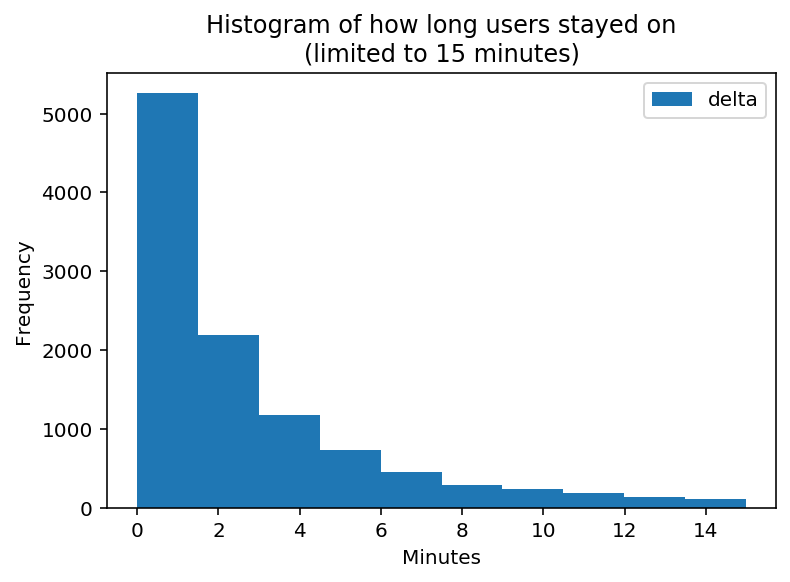

In [6]:
delta = times[1] - times[0]
i = delta < 60*15
delta = delta[i]
delta = np.clip(delta, 0, np.inf)
delta /= 60
print("Average user stayed on for {} seconds".format(delta.mean()))
delta_df = pd.DataFrame({'delta': delta})
delta_df.plot.hist(title='Histogram of how long users stayed on\n(limited to 15 minutes)')
plt.xlabel('Minutes')

Resolution: 1.0 minutes


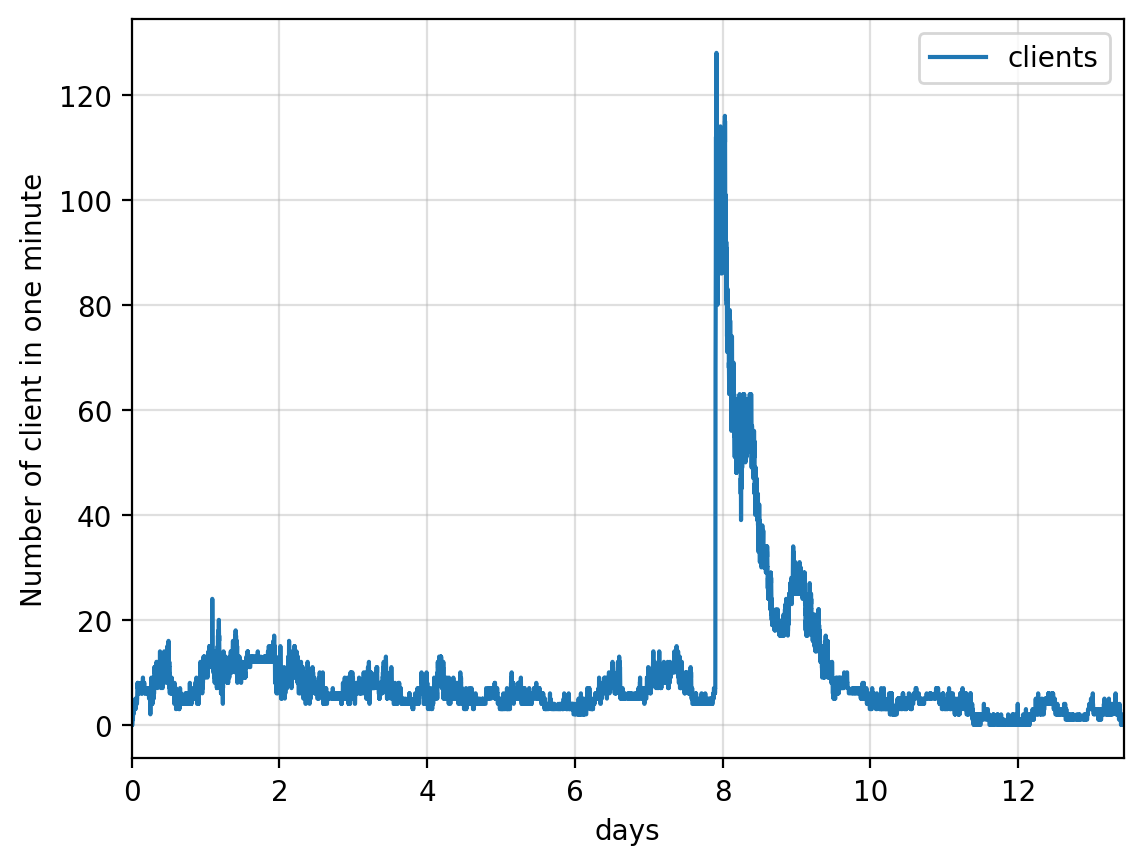

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

start, end = times.min(), times.max()
T = np.arange(start, end, 60)
print("Resolution: {} minutes".format((T[1] - T[0]) / 60))

out = []
for t in T:
    started_before_t = (times[0] < t)
    ended_after_t = (t < times[1])
    i = started_before_t & ended_after_t
    out += [{'seconds': t, 'clients': i.sum()}]

out = pd.DataFrame(out)
out['seconds'] -= out['seconds'].min()
out['minutes'] = out['seconds'] / 60
out['hours'] = out['minutes'] / 60
out['days'] = out['hours'] / 24
ax = out.plot(x='days', y='clients')
ax.set_ylabel('Number of client in one minute')
# ax.set_yscale("log")
ax.grid(alpha=0.4)